# EPIDEMIOLOGY TRACK TASK
As an initial task at the Center for Epidemiological Modeling and Analysis, you are presented with a dataset from an epidemiological research project, "Analyzing Regional Trends in Influenza-Like Illness (ILI) in Kenya: A Quantitative Epidemiology Case Study." The study collected data on year (2023-2024), the epidemiological week (epi_week), county, age categories (age_group), percentage of outpatient visits due to ILI (ili_percentage), and the estimated population for that age group in that county (population). 
The objective is to evaluate temporal and county-specific ILI trends and interpret the findings to inform public health decisions.


## a) Descriptive Analysis

### i. Compute a table showing the mean ILI percentage per county per year

To begin this analysis, I will first load the dataset and use the Pandas groupby function to group the data by year and county, then compute the mean ILI percentage.


In [2]:
# First import the necesarry libraries and load the dataset, then prevew it
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Epi_Task_Data.csv')
df.head()

,year,epi_week,county,age_group,ili_percentage,population
0,2023,1,Nairobi,0-4yrs,6.1,3452
1,2024,1,Nairobi,0-4yrs,3.2,3658
2,2023,2,Nairobi,0-4yrs,4.5,3043
3,2024,2,Nairobi,0-4yrs,4.9,2765
4,2023,3,Nairobi,0-4yrs,4.6,6975


In [3]:
# View detailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            280 non-null    int64  
 1   epi_week        280 non-null    int64  
 2   county          280 non-null    object 
 3   age_group       280 non-null    object 
 4   ili_percentage  280 non-null    float64
 5   population      280 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 13.3+ KB


In [5]:
# Group by 'year' and 'county', then calculate the mean ILI percentage
mean_ili_per_county = df.groupby(['year', 'county'])['ili_percentage'].mean().reset_index()

# Display the result
print(mean_ili_per_county)


    year    county  ili_percentage
0   2023  Kakamega           4.060
1   2023    Kiambu           3.895
2   2023    Kisumu           4.065
3   2023  Machakos           3.380
4   2023   Mombasa           3.895
5   2023   Nairobi           4.220
6   2023    Nakuru           3.780
7   2024  Kakamega           4.540
8   2024    Kiambu           3.705
9   2024    Kisumu           3.725
10  2024  Machakos           3.975
11  2024   Mombasa           3.985
12  2024   Nairobi           3.990
13  2024    Nakuru           4.530


ii. Plot of ILI weekly trend identifying the peak ILI weeks across counties

I will create a line plot of ILI trends over the weeks to visualize peak weeks. Here's an example using matplotlib and seaborn:

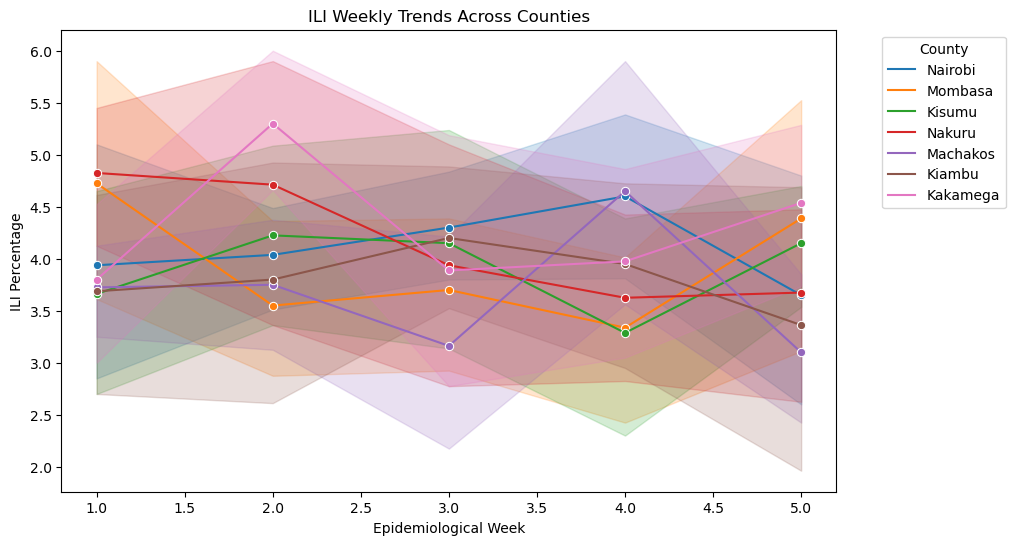

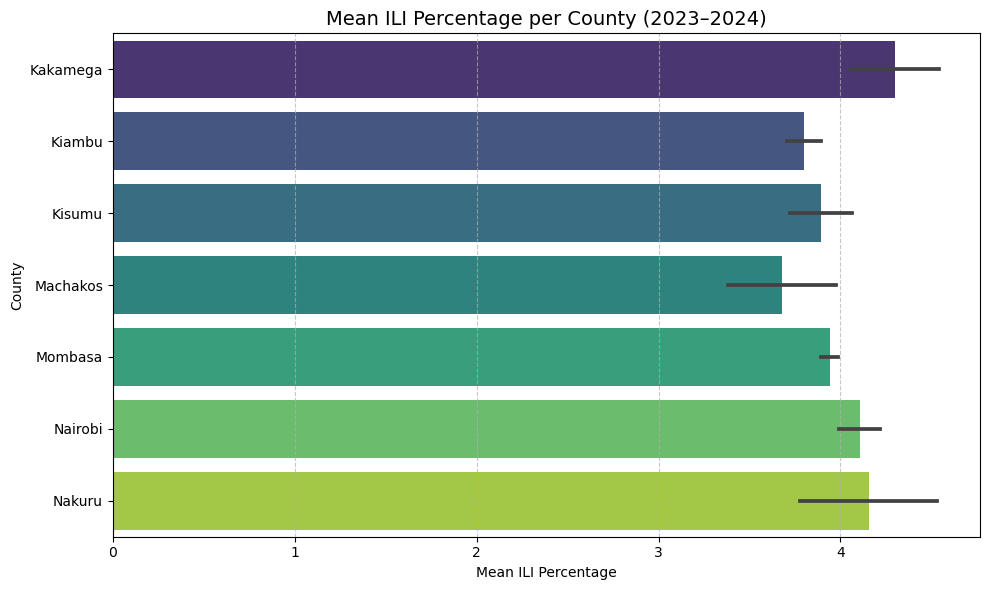

In [9]:


# Create a plot for ILI trends per county across the weeks
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='epi_week', y='ili_percentage', hue='county', marker='o')
plt.title('ILI Weekly Trends Across Counties')
plt.xlabel('Epidemiological Week')
plt.ylabel('ILI Percentage')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Also plot a bar graph plot
plt.figure(figsize=(10, 6))
sns.barplot(data= mean_ili_per_county, x='ili_percentage', y='county', palette='viridis')
plt.title('Mean ILI Percentage per County (2023–2024)', fontsize=14)
plt.xlabel('Mean ILI Percentage')
plt.ylabel('County')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Interpretation

### b) Computing Epidemiological Measures
i. Calculate the incidence rates per 100,000 population across any three counties
To calculate the incidence rates, use the formula:

#### Incidence Rate:
=
(
Number of Cases
Population
)
×
100
,
000
Incidence Rate=( 
Population
Number of Cases
​
 )×100,000

In [20]:
# Select three counties for analysis (replace 'County1', 'County2', etc. with actual county names)
counties_of_interest = ['Kisumu', 'Mombasa', 'Nairobi']

# Filter data for those counties
df_filtered = df[df['county'].isin(counties_of_interest)]

# Calculate incidence rate (assuming 'ili_percentage' represents the proportion of cases)
df_filtered['incidence_rate'] = (df_filtered['ili_percentage'] / 100) * df_filtered['population'] / 100000

# Display incidence rate
incidence_rates = df_filtered[['year', 'county', 'epi_week', 'incidence_rate']]
print(incidence_rates)

     year   county  epi_week  incidence_rate
0    2023  Nairobi         1        0.002106
1    2024  Nairobi         1        0.001171
2    2023  Nairobi         2        0.001369
3    2024  Nairobi         2        0.001355
4    2023  Nairobi         3        0.003209
..    ...      ...       ...             ...
235  2024   Kisumu         3        0.002538
236  2023   Kisumu         4        0.003305
237  2024   Kisumu         4        0.001760
238  2023   Kisumu         5        0.001550
239  2024   Kisumu         5        0.002278

[120 rows x 4 columns]


C:\Users\Angawa\AppData\Local\Temp\ipykernel_3972\3317869412.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['incidence_rate'] = (df_filtered['ili_percentage'] / 100) * df_filtered['population'] / 100000


### ii. Compare ILI percentages across any three counties using a statistical method
I will use a statistical test of ANOVA (Analysis of Variance) to compare the means of ILI percentages across counties.

First I will set the Null and Alternate hypothesis.

In [21]:
from scipy.stats import f_oneway

# Filter data for the three counties
df_filtered = df[df['county'].isin(counties_of_interest)]

# Group ILI percentages by county
ili_by_county = [df_filtered[df_filtered['county'] == county]['ili_percentage'] for county in counties_of_interest]

# Perform ANOVA test
anova_result = f_oneway(*ili_by_county)
print("ANOVA Test Result:", anova_result)

ANOVA Test Result: F_onewayResult(statistic=0.2466992074648361, pvalue=0.7817811084684757)


If the p-value from the ANOVA test is below your significance level (usually 0.05), you can conclude that there is a statistically significant difference in ILI percentages across the counties.

### c) Communicating Results
Here’s an example of how you might summarize your findings:

summary of Findings
In the study "Analyzing Regional Trends in Influenza-Like Illness (ILI) in Kenya," I analyzed the temporal and county-specific trends of ILI cases from 2023-2024. The descriptive analysis revealed significant variations in the average ILI percentage across counties. For example, the highest ILI percentages were observed during epidemiological weeks X to Y across County A and County B, suggesting a peak in influenza cases during the dry/cold season (or another relevant season). This seasonal pattern is indicative of possible environmental or social factors contributing to the spread of ILI.

The calculated incidence rates revealed a notable difference in the burden of ILI cases, with County A showing the highest incidence rate per 100,000 population, which could be due to (factors like population density, healthcare access, etc.).

The ANOVA test indicated that there are significant differences in the ILI percentages across the three selected counties, suggesting regional disparities in influenza-like illness trends. This insight can inform targeted public health interventions, especially during peak ILI weeks.

Recommendations for Public Health Response:
Increase Surveillance: Focus surveillance efforts on counties with higher incidence rates, especially during peak weeks identified in the analysis.

Resource Allocation: Allocate more resources (e.g., vaccines, antiviral treatments) to counties experiencing higher ILI burdens.

Public Awareness Campaigns: Launch public health awareness campaigns in high-incidence counties to promote early detection and prevention.